In [63]:
import pandas as pd

num_examples = 486810
results = pd.read_csv("queryopt_results.csv")
# results["x"] = -results["num_regress"] / num_examples
results["x"] = results["avg_regress"]
results["y"] = results["sum_reward"] / num_examples
results.sort_values(by="x", ascending=False, inplace=True)
scores = results[["x", "y", "q"]].to_numpy()


In [64]:
import numpy as np


def identify_pareto(scores):
    population_size = scores.shape[0]
    population_ids = np.arange(population_size)
    pareto_front = np.ones(population_size, dtype=bool)

    for i in range(population_size):
        for j in range(population_size):
            if all(scores[j][0:2] >= scores[i][0:2]) and any(
                scores[j][0:2] > scores[i][0:2]
            ):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = False
                break

    return population_ids[pareto_front]


pareto = identify_pareto(scores)
scores[pareto, :]


array([[-2.55258905e-03,  8.85959642e-02,  1.00000000e-04],
       [-3.50904719e-03,  1.03774755e-01,  5.00000000e-04],
       [-3.90787817e-03,  1.13149069e-01,  1.00000000e-03],
       [-4.52480208e-03,  1.22701660e-01,  3.00000000e-03],
       [-4.64803225e-03,  1.26229487e-01,  5.00000000e-03],
       [-5.23454117e-03,  1.28588328e-01,  6.00000000e-03],
       [-5.60793529e-03,  1.31980946e-01,  9.00000000e-03],
       [-5.62050069e-03,  1.34292681e-01,  1.00000000e-02],
       [-6.73073364e-03,  1.45159122e-01,  2.00000000e-02],
       [-7.50992217e-03,  1.49878993e-01,  3.00000000e-02],
       [-7.97548792e-03,  1.55158339e-01,  4.00000000e-02],
       [-9.37993602e-03,  1.57434326e-01,  5.00000000e-02],
       [-9.59542776e-03,  1.59482062e-01,  6.00000000e-02],
       [-1.01321902e-02,  1.60485608e-01,  7.00000000e-02],
       [-1.02512055e-02,  1.62910743e-01,  8.00000000e-02],
       [-1.05176403e-02,  1.63622006e-01,  9.00000000e-02],
       [-1.10581577e-02,  1.64082685e-01

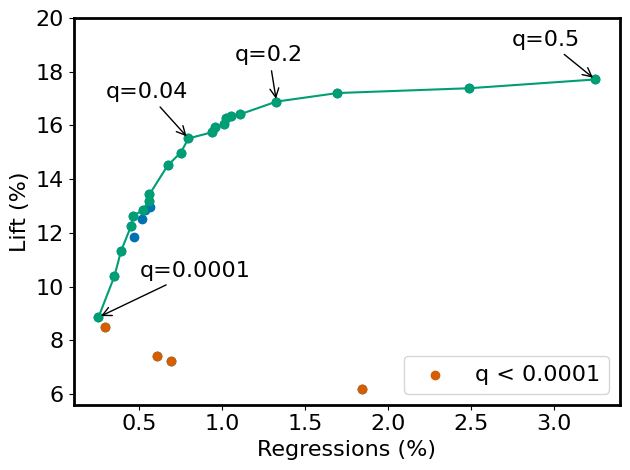

In [65]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("seaborn-colorblind")

x_all, y_all, q_all = -scores[:, 0], scores[:, 1], scores[:, 2]
x_pareto, y_pareto = -scores[pareto, 0], scores[pareto, 1]
x_all = 100 * x_all
y_all = 100 * y_all
x_pareto = 100 * x_pareto
y_pareto = 100 * y_pareto

rightpoint, leftpoint = max(scores[pareto, :], key=lambda x: x[1]), max(
    scores[pareto, :], key=lambda x: x[0]
)
xrightpoint, yrightpoint, qrightpoint = (
    -100 * rightpoint[0],
    100 * rightpoint[1],
    rightpoint[2],
)
xleftpoint, yleftpoint, qleftpoint = (
    -100 * leftpoint[0],
    100 * leftpoint[1],
    leftpoint[2],
)
xmidpoint, ymidpoint, qmidpoint = [
    (-100 * v[0], 100 * v[1], v[2])
    for v in scores[pareto, :]
    if v[2] == 0.2
][0]
xmegapoint, ymegapoint, qmegapoint = [
    (-100 * v[0], 100 * v[1], v[2])
    for v in scores[pareto, :]
    if v[2] == 0.04
][0]

plt.scatter(x_all, y_all, color="C0")
plt.scatter(
    [x for x, q in zip(x_all, q_all) if q < qleftpoint],
    [y for y, q in zip(y_all, q_all) if q < qleftpoint],
    color="C2",
    label=f"q < {qleftpoint}",
)
plt.scatter(x_pareto, y_pareto, color="C1")
plt.plot(x_pareto, y_pareto, color="C1")
# plt.xlim(0, 3.5)
plt.ylim(top=20)
# plt.xlim(7, 12)
# plt.ylim(6, 20)
plt.xlabel("Regressions (%)", fontsize=16)
plt.ylabel("Lift (%)", fontsize=16)
plt.annotate(
    f"q={qrightpoint}",
    xy=(xrightpoint, yrightpoint),
    xytext=(xrightpoint-0.5, yrightpoint + 1.25),
    fontsize=16,
    arrowprops=dict(arrowstyle="->"),
)
plt.annotate(
    f"q={qleftpoint}",
    xy=(xleftpoint, yleftpoint),
    xytext=(xleftpoint + 0.25, yleftpoint + 1.5),
    fontsize=16,
    arrowprops=dict(arrowstyle="->"),
)
plt.annotate(
    f"q={qmidpoint}",
    xy=(xmidpoint, ymidpoint),
    xytext=(xmidpoint - 0.25, ymidpoint + 1.5),
    fontsize=16,
    arrowprops=dict(arrowstyle="->"),
)
plt.annotate(
    f"q={qmegapoint}",
    xy=(xmegapoint, ymegapoint),
    xytext=(xmegapoint - 0.5, ymegapoint + 1.5),
    fontsize=16,
    arrowprops=dict(arrowstyle="->"),
)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc="lower right")
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.tight_layout()
plt.savefig("queryopt_pareto.pdf")
